In [1]:
#connect google colab with google drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
#import the libraries to load dataset
import zipfile
import os

#opens file in readmode
zip_ref = zipfile.ZipFile('/content/gdrive/MyDrive/MajorProject/br35hdataset/train.zip')


#extracts the files into the /MajorProject folder
zip_ref.extractall('/content/gdrive/MyDrive/MajorProject/br35hdataset')

#close the file
zip_ref.close()

In [3]:
#import the libraries to load dataset
import zipfile
import os

#opens file in readmode
zip_ref = zipfile.ZipFile('/content/gdrive/MyDrive/MajorProject/br35hdataset/test.zip')


#extracts the files into the /MajorProject folder
zip_ref.extractall('/content/gdrive/MyDrive/MajorProject/br35hdataset')

#close the file
zip_ref.close()

In [4]:
#import the libraries to load dataset
import zipfile
import os

#opens file in readmode
zip_ref = zipfile.ZipFile('/content/gdrive/MyDrive/MajorProject/br35hdataset/validation.zip')


#extracts the files into the /MajorProject folder
zip_ref.extractall('/content/gdrive/MyDrive/MajorProject/br35hdataset')

#close the file
zip_ref.close()

In [5]:
import os
import glob

folder_path = '/content/gdrive/MyDrive/MajorProject/br35hdataset/train'  # replace with the actual folder path

yes_path = os.path.join(folder_path, 'yes')
no_path = os.path.join(folder_path, 'no')

yes_count = len(glob.glob(os.path.join(yes_path, '*.jpg')))  # replace '*.jpg' with the actual file extension of your images
no_count = len(glob.glob(os.path.join(no_path, '*.jpg')))  # replace '*.jpg' with the actual file extension of your images

print(f'Total images in "yes" folder: {yes_count}')
print(f'Total images in "no" folder: {no_count}')
print(yes_count+no_count)


Total images in "yes" folder: 7180
Total images in "no" folder: 7220
14400


In [6]:
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [7]:
# Set the image size and batch size
img_size = (256, 256)
batch_size = 32

In [8]:
# Define data paths
train_path = '/content/gdrive/MyDrive/MajorProject/br35hdataset/train'
test_path = '/content/gdrive/MyDrive/MajorProject/br35hdataset/test'
val_path = '/content/gdrive/MyDrive/MajorProject/br35hdataset/validation'

In [9]:
# Create data generators with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255
)

test_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 14400 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


In [10]:
# Load the pretrained DenseNet169 model without the top (fully connected) layers
base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

51877672/51877672 [==============================] - 3s 0us/step


In [11]:
# Create a new model and add the base model and new fully connected layers
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))  # 2 classes: 'yes' and 'no'

In [12]:
# Freeze the base model layers
base_model.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Train the model
num_epochs = 30
steps_per_epoch = train_generator.samples // batch_size
val_steps = val_generator.samples // batch_size

In [14]:
history= model.fit(
    train_generator,
    epochs=num_epochs,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=val_steps
)



Epoch 1/30
450/450 [==============================] - 153s 295ms/step - loss: 0.9531 - accuracy: 0.9326 - val_loss: 0.1242 - val_accuracy: 0.9782
Epoch 2/30
450/450 [==============================] - 113s 252ms/step - loss: 0.1601 - accuracy: 0.9734 - val_loss: 0.1351 - val_accuracy: 0.9777
Epoch 3/30
450/450 [==============================] - 122s 271ms/step - loss: 0.0484 - accuracy: 0.9877 - val_loss: 0.0476 - val_accuracy: 0.9911
Epoch 4/30
450/450 [==============================] - 112s 250ms/step - loss: 0.0297 - accuracy: 0.9908 - val_loss: 0.0458 - val_accuracy: 0.9883
Epoch 5/30
450/450 [==============================] - 119s 265ms/step - loss: 0.0103 - accuracy: 0.9962 - val_loss: 0.0405 - val_accuracy: 0.9905
Epoch 6/30
450/450 [==============================] - 121s 268ms/step - loss: 0.0150 - accuracy: 0.9948 - val_loss: 0.0365 - val_accuracy: 0.9888
Epoch 7/30
450/450 [==============================] - 122s 270ms/step - loss: 0.0122 - accuracy: 0.9960 - val_loss: 0.0320 -

In [15]:
# Evaluate the model on the test set
test_steps = test_generator.samples // batch_size
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_steps)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

56/56 [==============================] - 13s 236ms/step - loss: 0.0273 - accuracy: 0.9961
Test Loss: 0.027293818071484566
Test Accuracy: 0.99609375


In [16]:
# Save the model
model.save('/content/gdrive/MyDrive/MajorProject/densenet.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model

densenet_model = load_model('/content/gdrive/MyDrive/MajorProject/densenet.h5')

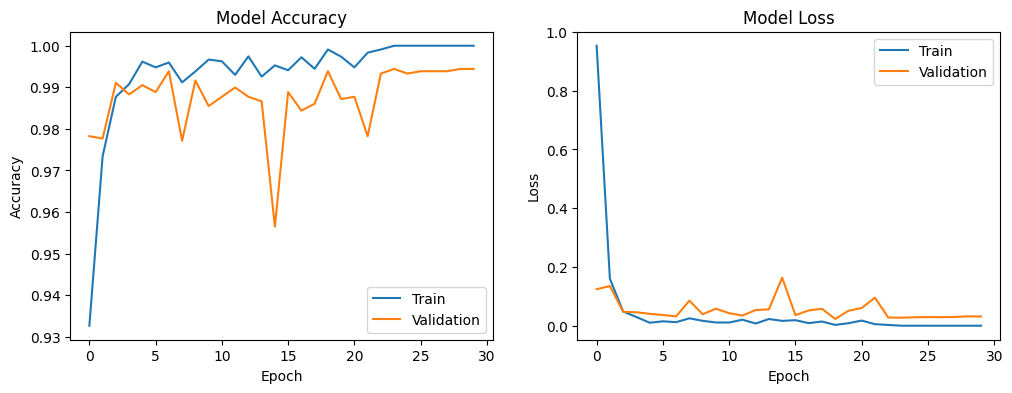

In [17]:
import matplotlib.pyplot as plt

# Plot training vs test accuracy and loss, and training vs validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

57/57 [==============================] - 16s 275ms/step


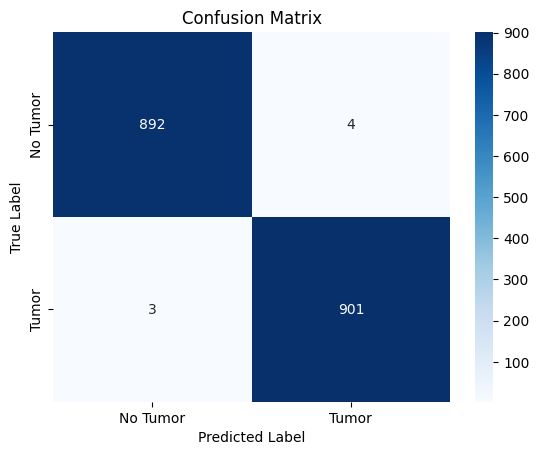

In [19]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate predictions for the test data
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels for the test data
y_true = test_generator.classes

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Tumor', 'Tumor'],
            yticklabels=['No Tumor', 'Tumor'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()



In [20]:
X_test, y_test = test_generator.next()

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

# Get the predicted labels for the test data
y_pred = model.predict(X_test)

# Convert the predicted labels to binary values (0 or 1)
y_pred_binary = np.argmax(y_pred, axis=1)

# Calculate precision, recall, sensitivity, specificity, f1 score, and f beta score
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
sensitivity = recall
specificity = tn / (tn + fp)
f1_score = 2 * (precision * recall) / (precision + recall)
beta = 2
f_beta_score = (1 + beta ** 2) * (precision * recall) / (beta ** 2 * precision + recall)

# Print the metrics
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("Sensitivity: {:.4f}".format(sensitivity))
print("Specificity: {:.4f}".format(specificity))
print("F1 Score: {:.4f}".format(f1_score))
print("F Beta Score: {:.4f}".format(f_beta_score))

1/1 [==============================] - 4s 4s/step
Precision: 0.9956
Recall: 0.9967
Sensitivity: 0.9967
Specificity: 0.9955
F1 Score: 0.9961
F Beta Score: 0.9965
